In [2]:
import pandas as pd
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style

In [3]:
def best_configuration_per_fold(dataset, no_folds):
    best_configuration = pd.DataFrame(columns=dataset.columns)
    
    for i in range(1, no_folds+1):
        subset_fold = dataset.loc[dataset["validation_fold"]=="fold "+str(i)]
        index_lowest_loss = subset_fold["validation_loss"].idxmin()
        row = dataset.iloc[index_lowest_loss].to_dict()
        best_configuration= best_configuration.append(row, ignore_index = True)

    return best_configuration

In [4]:
def performance_each_configuration_over_all_folds(dataset, no_folds):
    mean_each_configuration = pd.DataFrame(columns=dataset.columns)
    no_configurations = int(dataset.shape[0] / no_folds)
    
    for i in range(no_configurations):
        validation_losses = []
        training_losses = []
        current_configuration = dataset.iloc[i,:].drop(labels=["validation_fold", "training_loss", "validation_loss"])
        for fold in range(1,no_folds+1):
            subset_fold = dataset.loc[dataset["validation_fold"]=="fold "+str(fold)]
            loss_current_fold = subset_fold["validation_loss"].iloc[i]
            train_loss_current_fold = subset_fold["training_loss"].iloc[i]
            validation_losses.append(loss_current_fold)
            training_losses.append(train_loss_current_fold)
        
        current_configuration["mean loss val"] = round(statistics.mean(validation_losses),4)
        current_configuration["mean loss train"] = round(statistics.mean(training_losses),4)
        current_configuration["sd loss val"] = round(statistics.stdev(validation_losses),4)
        current_configuration["sd loss train"] = round(statistics.stdev(training_losses),4)
        mean_each_configuration = mean_each_configuration.append(current_configuration.to_dict(), ignore_index = True)

    return mean_each_configuration.dropna(axis=1)

## Dataset

In [5]:
method = "MSE"
#dataset = "artifical_data_configurations.csv"
#dataset = "cpps_configurations.csv"
#dataset = "phm67_configurations.csv"
#dataset = "XXXX.csv"
dataset = "XXXXeval.csv"

In [8]:
method = "MLE"
#dataset = "MLE1_artifical_data_configurations.csv"
dataset = "cpps_configurations_A3.csv"
#dataset = "MLE1_phm67_configurations.csv"

In [6]:
results = pd.read_csv("../../../models/cross_validation/{}/{}".format(method, dataset), sep=";")

# Get statistics

In [7]:
best_configuration = best_configuration_per_fold(dataset=results, no_folds=4)
best_configuration.head()

,validation_fold,validation_loss,training_loss,n_hidden_lstm,sequence_length,n_lstm_layer,n_hidden_fc,Unnamed: 7
0,fold 1,0.547212,0.568063,1,8,1,21,NaN
1,fold 2,0.535092,0.567628,1,8,1,21,NaN
2,fold 3,0.555217,0.567704,1,8,1,21,NaN
3,fold 4,0.543995,0.568899,1,8,1,21,NaN


In [8]:
performance_config = performance_each_configuration_over_all_folds(dataset=results, no_folds=4)
final_results = performance_config.sort_values(by=['mean loss val'])
final_results = final_results.rename(columns={"n_hidden_lstm": "Hidden units LSTM", 
                                              "sequence_length": "Sequence lenght",
                                              "n_lstm_layer": "LSTM layer",
                                              "n_hidden_fc": "Hidden units FC",
                                              "mean loss": "Mean loss",
                                              })
final_results.head(50)

,Hidden units LSTM,Sequence lenght,LSTM layer,Hidden units FC,mean loss train,mean loss val,sd loss train,sd loss val
1,1.0,8.0,1.0,21.0,0.5681,0.5454,0.0006,0.0083
3,1.0,21.0,1.0,21.0,0.5714,0.5496,0.0002,0.0084
0,1.0,8.0,1.0,8.0,0.5952,0.5519,0.0002,0.0082
2,1.0,21.0,1.0,8.0,0.6025,0.5582,0.0011,0.0077


In [ ]:
final_results = final_results.iloc[:8,:]

## Results of Grid Search

ValueError: Could not interpret input 'mean loss'

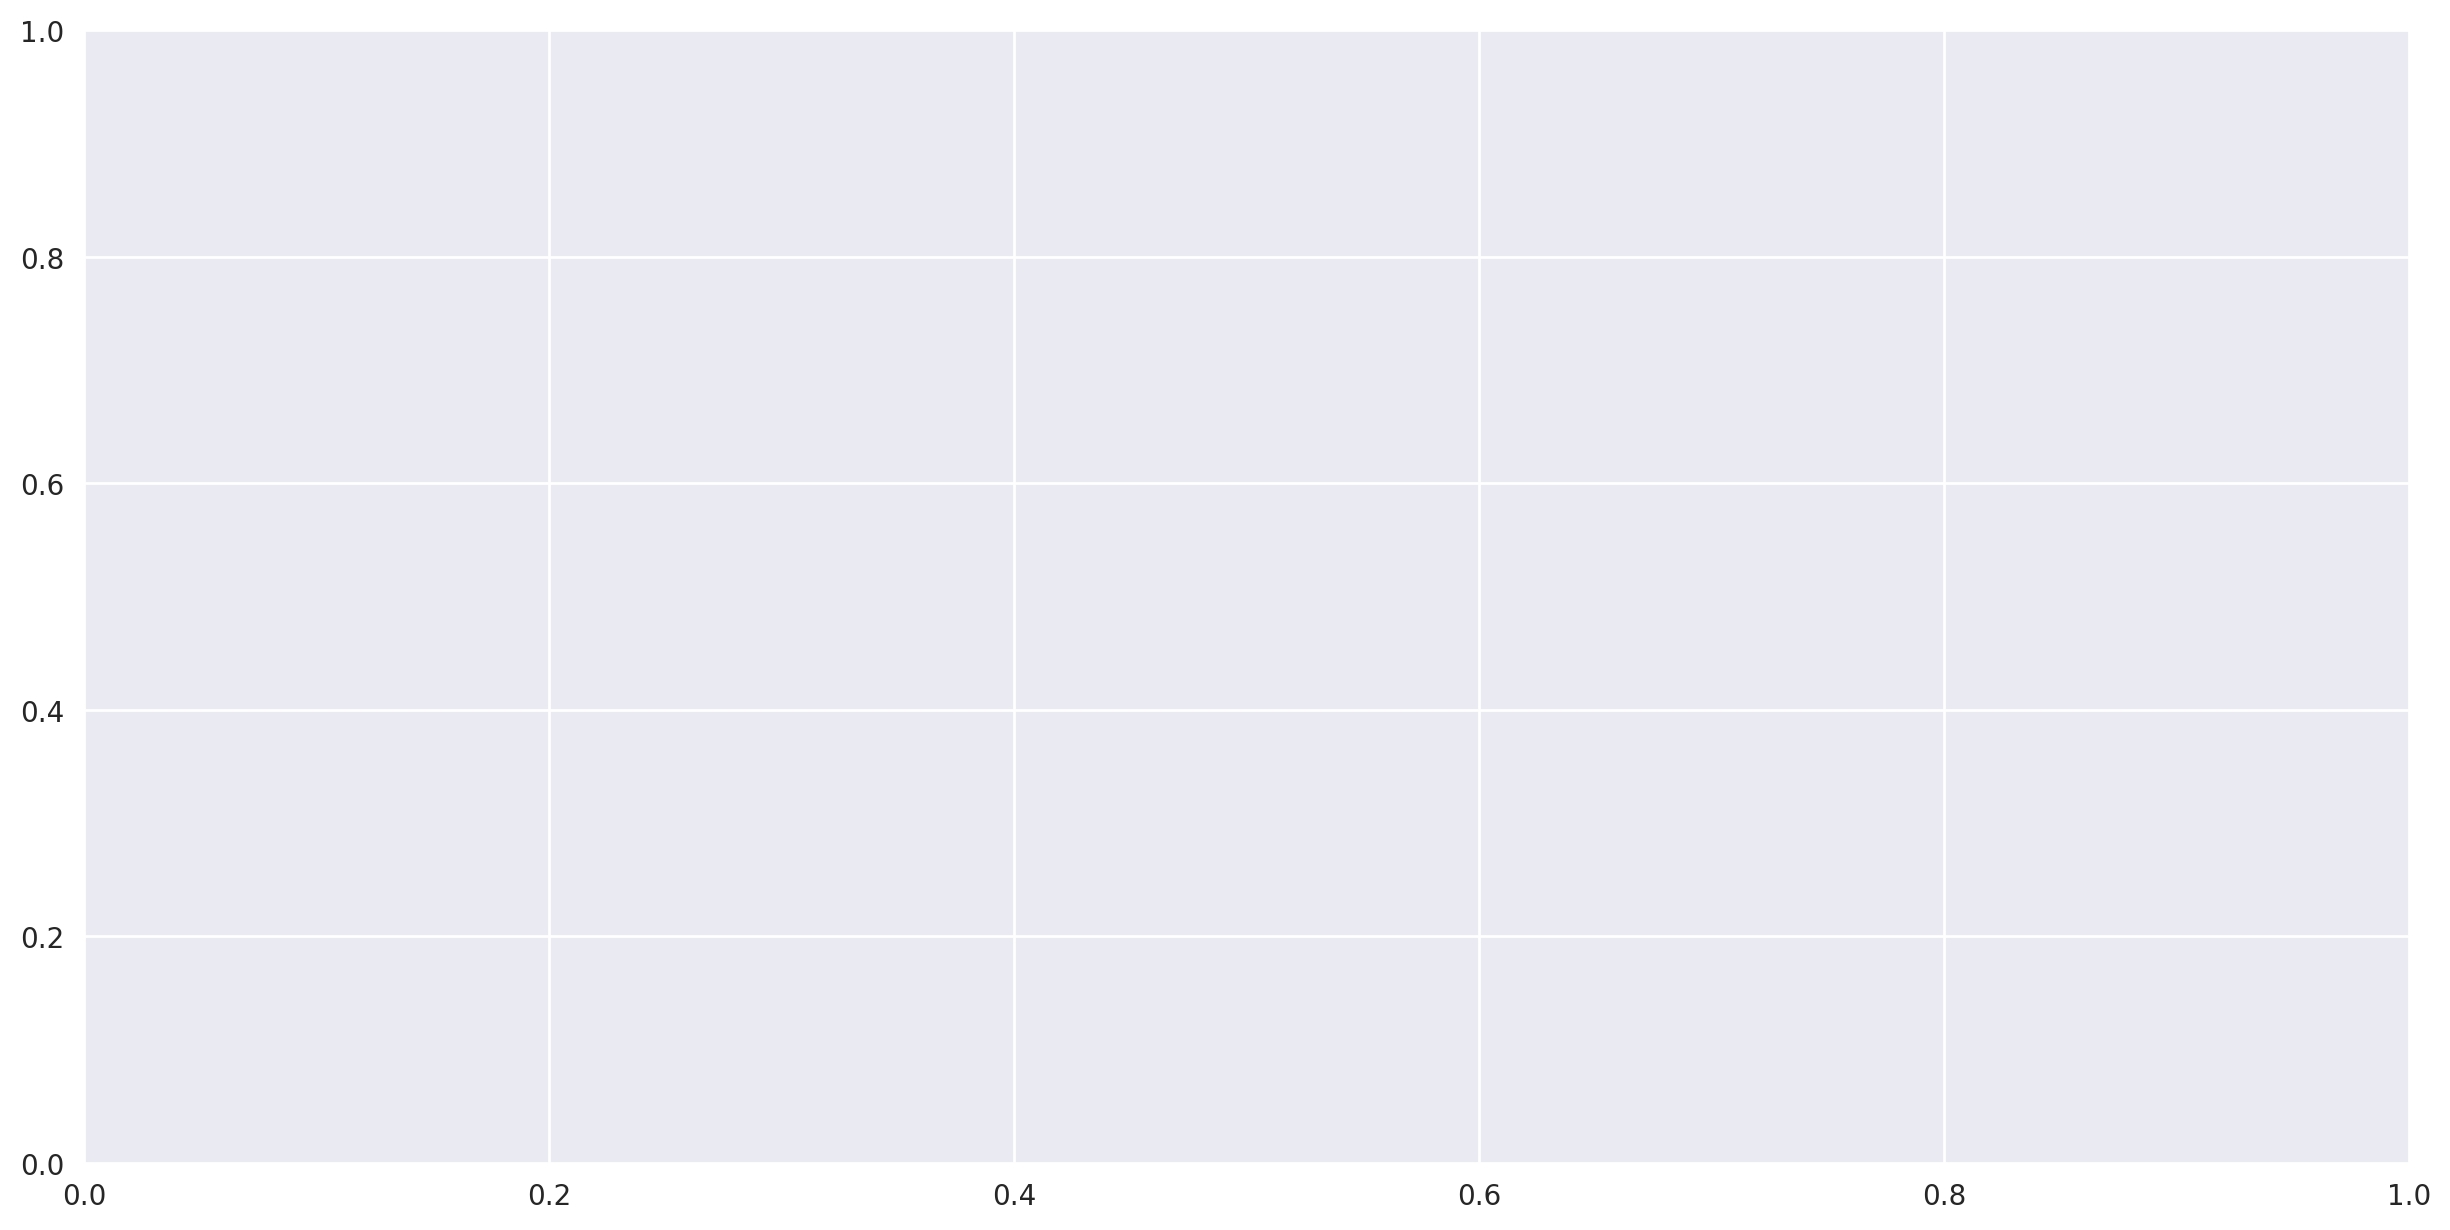

In [36]:
style.use("seaborn")
f, ax = plt.subplots(figsize=(15,7.5), dpi=200)
sns.scatterplot(x="sequence_length", y="mean loss", data=performance_config, hue="n_hidden_fc", style="n_hidden_lstm",
                ax=ax, legend="full", sizes=(100, 300))
plt.gca().invert_yaxis()
plt.show()

## Store results

In [61]:
#name_file = "artificalDataConfigurations.csv"
#name_file = "cppsConfigurations.csv"
name_file = "phm67Configurations.csv"

In [62]:
final_results.to_csv("./{}/{}".format(method, name_file), sep=";", index=False)